In [ ]:
AccelerateAI
Data Science Global Bootcamp
Assignment 07

In [ ]:
Q1. MLR Stepwise Regression – Household Expense

In [78]:
# import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [79]:
# import the dataset
MLR_MonthlyExpense_df = pd.read_csv('MLR_MonthlyExpense.csv')
# first five entries of the dataset
MLR_MonthlyExpense_df.head()

,Household,Monthly Payment,Family Size,Sector No,Rent,Own,Income,Utilities,Debt
0,1,"$1,585",2,2,0,1,"$96,709",$252,"$5,692"
1,2,"$1,314",6,2,1,0,"$77,470",$216,"$4,267"
2,3,$383,3,4,1,0,"$65,746",$207,"$2,903"
3,4,"$1,002",1,1,0,1,"$56,610",$249,"$3,896"
4,5,$743,3,3,1,0,"$59,185",$217,"$3,011"


In [80]:
MLR_MonthlyExpense_df.describe()

,Household,Family Size,Sector No,Rent,Own
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,2.996000,2.494000,0.436000,0.564000
std,144.481833,1.563609,1.131603,0.496384,0.496384
min,1.000000,1.000000,1.000000,0.000000,0.000000
25%,125.750000,2.000000,1.000000,0.000000,0.000000
50%,250.500000,3.000000,2.000000,0.000000,1.000000
75%,375.250000,4.000000,4.000000,1.000000,1.000000
max,500.000000,10.000000,4.000000,1.000000,1.000000


In [81]:
MLR_MonthlyExpense_df.dtypes
 

Household           int64
Monthly Payment    object
Family Size         int64
Sector No           int64
Rent                int64
Own                 int64
Income             object
Utilities          object
Debt               object
dtype: object

In [82]:
# convert all objects to numerical
MLR_MonthlyExpense_df["Monthly Payment"] = MLR_MonthlyExpense_df["Monthly Payment"].apply(lambda x: int(x.replace('$','').replace(',','')))
#MLR_MonthlyExpense_df["Monthly Payment","Income","Utilities","Debt"] = MLR_MonthlyExpense_df["Monthly Payment","Income","Utilities","Debt"].apply(lambda x: int(x.replace('$','').replace(',','')))
MLR_MonthlyExpense_df["Income"] = MLR_MonthlyExpense_df["Income"].apply(lambda x: int(x.replace('$','').replace(',','')))
MLR_MonthlyExpense_df["Utilities"] = MLR_MonthlyExpense_df["Utilities"].apply(lambda x: int(x.replace('$','').replace(',','')))
MLR_MonthlyExpense_df["Debt"] = MLR_MonthlyExpense_df["Debt"].apply(lambda x: int(x.replace('$','').replace(',','')))

In [83]:
MLR_MonthlyExpense_df.head()

,Household,Monthly Payment,Family Size,Sector No,Rent,Own,Income,Utilities,Debt
0,1,1585,2,2,0,1,96709,252,5692
1,2,1314,6,2,1,0,77470,216,4267
2,3,383,3,4,1,0,65746,207,2903
3,4,1002,1,1,0,1,56610,249,3896
4,5,743,3,3,1,0,59185,217,3011


In [24]:
#check for categories
MLR_MonthlyExpense_df["Sector No"].value_counts()


1    129
4    128
2    123
3    120
Name: Sector No, dtype: int64

In [25]:
#check for categories. 
#I believe in this case the order is important.I wonder if this shoud be treated differently
MLR_MonthlyExpense_df["Family Size"].value_counts()

3     133
2     114
1      90
4      85
5      52
6      15
8       4
7       3
10      2
9       2
Name: Family Size, dtype: int64

In [8]:
MLR_MonthlyExpense_dumy_df= pd.get_dummies(MLR_MonthlyExpense_df, columns=["Sector No","Family Size"], drop_first = True)
MLR_MonthlyExpense_dumy_df.sample(2)


,Household,Monthly Payment,Rent,Own,Income,Utilities,Debt,Sector No_2,Sector No_3,Sector No_4,Family Size_2,Family Size_3,Family Size_4,Family Size_5,Family Size_6,Family Size_7,Family Size_8,Family Size_9,Family Size_10
242,243,1251,0,1,65717,263,6689,0,0,0,0,0,1,0,0,0,0,0,0
479,480,1078,1,0,87205,205,3606,0,1,0,0,1,0,0,0,0,0,0,0


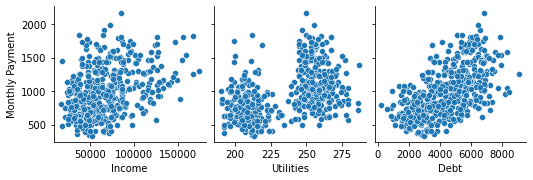

In [10]:
# relationship of monthly payment with the other predictors
sns.pairplot(MLR_MonthlyExpense_df,     
             x_vars=['Income','Utilities','Debt'],
             y_vars=['Monthly Payment'])

In [13]:
#drop  rent or  own to avoid since they are encoded. Avoid multicollinearity
X = MLR_MonthlyExpense_dumy_df.drop(["Household","Monthly Payment","Rent"], axis=1)
X.sample(2)

,Own,Income,Utilities,Debt,Sector No_2,Sector No_3,Sector No_4,Family Size_2,Family Size_3,Family Size_4,Family Size_5,Family Size_6,Family Size_7,Family Size_8,Family Size_9,Family Size_10
480,0,50855,208,1909,0,0,1,0,1,0,0,0,0,0,0,0
384,0,34195,213,3051,0,0,1,0,1,0,0,0,0,0,0,0


In [14]:
#Check correlation
X.corr()

,Own,Income,Utilities,Debt,Sector No_2,Sector No_3,Sector No_4,Family Size_2,Family Size_3,Family Size_4,Family Size_5,Family Size_6,Family Size_7,Family Size_8,Family Size_9,Family Size_10
Own,1.000000,0.259273,0.934552,0.743542,0.343010,-0.129188,-0.362191,0.064447,-0.027492,-0.031567,0.008879,0.060053,-0.036140,-0.011590,-0.008179,-0.072077
Income,0.259273,1.000000,0.281003,0.528817,0.464982,-0.172470,-0.429959,0.096697,0.128851,0.004891,0.115466,0.012865,-0.007277,0.020237,-0.027522,0.009373
Utilities,0.934552,0.281003,1.000000,0.777548,0.298652,-0.097667,-0.333299,-0.092801,0.019832,0.000943,0.167522,0.148832,0.047121,0.077620,0.058452,-0.018755
Debt,0.743542,0.528817,0.777548,1.000000,0.387116,-0.116640,-0.449218,-0.051967,0.025597,0.065537,0.120482,0.145733,0.069753,0.070309,0.064694,0.007287
Sector No_2,0.343010,0.464982,0.298652,0.387116,1.000000,-0.320982,-0.335054,0.076995,-0.039075,0.013475,0.018377,-0.018784,-0.044378,0.000834,-0.036198,-0.036198
Sector No_3,-0.129188,-0.172470,-0.097667,-0.116640,-0.320982,1.000000,-0.329634,0.007144,0.064437,-0.029920,-0.007364,-0.043923,0.016979,-0.050465,-0.035612,0.038580
Sector No_4,-0.362191,-0.429959,-0.333299,-0.449218,-0.335054,-0.329634,1.000000,-0.034779,-0.041983,0.051728,0.010329,-0.049430,-0.045574,0.050208,0.035431,0.035431
Family Size_2,0.064447,0.096697,-0.092801,-0.051967,0.076995,0.007144,-0.034779,1.000000,-0.327153,-0.245949,-0.185149,-0.095573,-0.042222,-0.048803,-0.034440,-0.034440
Family Size_3,-0.027492,0.128851,0.019832,0.025597,-0.039075,0.064437,-0.041983,-0.327153,1.000000,-0.272445,-0.205095,-0.105869,-0.046771,-0.054061,-0.038150,-0.038150
Family Size_4,-0.031567,0.004891,0.000943,0.065537,0.013475,-0.029920,0.051728,-0.245949,-0.272445,1.000000,-0.154187,-0.079590,-0.035162,-0.040642,-0.028680,-0.028680


In [15]:
# Check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
               index=X.columns)


## Deby and Ulitities have high-multicolnearity we will see with the stepwise regerssion if they will be part of the model

Own                7.034744
Income            12.900793
Utilities         28.507058
Debt              28.657601
Sector No_2        2.165025
Sector No_3        2.225110
Sector No_4        2.821263
Family Size_2      2.587931
Family Size_3      3.058502
Family Size_4      2.301090
Family Size_5      1.922988
Family Size_6      1.297955
Family Size_7      1.100924
Family Size_8      1.102325
Family Size_9      1.066106
Family Size_10     1.061582
dtype: float64

In [16]:
Y= MLR_MonthlyExpense_df["Monthly Payment"]

In [48]:
X.head(2)

,const,Own,Income,Utilities,Debt,Sector No_2,Sector No_3,Sector No_4,Family Size_2,Family Size_3,Family Size_4,Family Size_5,Family Size_6,Family Size_7,Family Size_8,Family Size_9,Family Size_10
0,1.0,1,96709,252,5692,1,0,0,1,0,0,0,0,0,0,0,0
1,1.0,0,77470,216,4267,1,0,0,0,0,0,0,1,0,0,0,0


In [18]:
Y.head(2)

0    1585
1    1314
Name: Monthly Payment, dtype: int64

In [50]:
# add a column of ones as integer data type
X= sm.add_constant(X)

In [51]:
X.head(2)

,const,Own,Income,Utilities,Debt,Sector No_2,Sector No_3,Sector No_4,Family Size_2,Family Size_3,Family Size_4,Family Size_5,Family Size_6,Family Size_7,Family Size_8,Family Size_9,Family Size_10
0,1.0,1,96709,252,5692,1,0,0,1,0,0,0,0,0,0,0,0
1,1.0,0,77470,216,4267,1,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
For this, use the monthly payment as the dependent variable
1) Begin with family size and iterative add one variable and estimate the resulting regression equation.

- Forward stepwise regression ??? Forward stepwise selection begins with a model containing no predictors
- backward stepwise selection, it begins with the full least squares model containing all p predictors, and then iteratively removes the least useful predictor,
one-at-a-time
-Hybrid

In [52]:
#I am not ure if the forward stepwise is the correct way but I have to start with family size
# choose a Significance level of .05 and select the predictor with lowest p value - provided its p value is less than .05

x_opt = X # initializing the dataframe containing optional/trial variable(s)
pvalue_df = pd.DataFrame() # Blank dataframe to store p values
for i in X:
    x_opt=X[i]
    results = sm.OLS(Y,x_opt).fit()
    pvalue_df=pvalue_df.append(pd.DataFrame(zip([i],[float(results.pvalues)]),columns =['Predictor', 'pvalue']))
    print("extracted pvalue for {} is {}".format(i,float(results.pvalues)))
    print('adj R Sq. is',results.rsquared_adj)
    print('----------------------------------------------')

extracted pvalue for const is 1.3238856902081358e-235
adj R Sq. is 0.0
----------------------------------------------
extracted pvalue for Own is 1.0889934402299867e-128
adj R Sq. is 0.6884912746315566
----------------------------------------------
extracted pvalue for Income is 3.061160307308705e-198
adj R Sq. is 0.8359879543045069
----------------------------------------------
extracted pvalue for Utilities is 2.0078864697812084e-260
adj R Sq. is 0.9075906898770324
----------------------------------------------
extracted pvalue for Debt is 1.605519325013131e-253
adj R Sq. is 0.9015134875764095
----------------------------------------------
extracted pvalue for Sector No_2 is 2.43432807534188e-50
adj R Sq. is 0.3588855954938086
----------------------------------------------
extracted pvalue for Sector No_3 is 1.582959211261215e-24
adj R Sq. is 0.18746421930075818
----------------------------------------------
extracted pvalue for Sector No_4 is 2.5502829501416437e-13
adj R Sq. is 0.10

In [53]:
pvalue_df = pvalue_df[pvalue_df["Predictor"].str.contains("const") == False]
pvalue_df.sort_values('pvalue',inplace=True)
pvalue_df

,Predictor,pvalue
0,Utilities,2.007886e-260
0,Debt,1.605519e-253
0,Income,3.061160e-198
0,Own,1.088993e-128
0,Sector No_2,2.434328e-50
0,Family Size_3,1.445167e-33
0,Family Size_2,3.802698e-28
0,Sector No_3,1.582959e-24
0,Family Size_4,7.316417e-18
0,Sector No_4,2.550283e-13


In [54]:
# Extract the name of the variable having lowest pvalue and push it into a list 
a = list(pvalue_df["Predictor"])
 # list containing name of the selected variable in first iteration
b = [a.pop(0)]
print("the list of selected varaiable after iteration  ", b)
print("list containing names of the trial variables  ", a)

the list of selected varaiable after iteration   ['Utilities']
list containing names of the trial variables   ['Debt', 'Income', 'Own', 'Sector No_2', 'Family Size_3', 'Family Size_2', 'Sector No_3', 'Family Size_4', 'Sector No_4', 'Family Size_5', 'Family Size_6', 'Family Size_8', 'Family Size_9', 'Family Size_7', 'Family Size_10']


In [55]:
# Now we select the variable containing lowest p value and add variavles one at a time iterativelty to check in which
# combination we get the new variable with lowest p value.

x_sel=X[b] #dataframe containing selected variable(s)
x_opt=X[a] #dataframe containing optional/trial variable(s)
pvalue_df = pd.DataFrame() # Blank dataframe to store p values
for i in x_opt:
    x_vars=pd.concat([x_sel,x_opt[i]], join = 'outer', axis = 1)
    x_vars=sm.add_constant(x_vars)
    results = sm.OLS(Y,x_vars).fit()
    pvalue_df=pvalue_df.append(pd.DataFrame(zip([i],[float(results.pvalues[2])]),columns =['Predictor', 'pvalue']))
    print("extracted pvalue for {} is {}".format(i,float(results.pvalues[2])))
    print("extracted pvalue for",b[0],"is",float(results.pvalues[1]))
    print('adj R Sq. is',results.rsquared_adj)
    print('----------------------------------------------')

extracted pvalue for Debt is 1.1987150119646222e-21
extracted pvalue for Utilities is 0.41511039957850526
adj R Sq. is 0.3641195912172418
----------------------------------------------
extracted pvalue for Income is 2.697251016098919e-13
extracted pvalue for Utilities is 1.506333605460051e-23
adj R Sq. is 0.31362379502032933
----------------------------------------------
extracted pvalue for Own is 2.9434208804326336e-12
extracted pvalue for Utilities is 0.0434330083391178
adj R Sq. is 0.3071078915832218
----------------------------------------------
extracted pvalue for Sector No_2 is 1.8259565591539036e-17
extracted pvalue for Utilities is 3.1551463583204907e-22
adj R Sq. is 0.33926941551353207
----------------------------------------------
extracted pvalue for Family Size_3 is 0.16627263938572898
extracted pvalue for Utilities is 2.8142747044937155e-31
adj R Sq. is 0.23860453481738575
----------------------------------------------
extracted pvalue for Family Size_2 is 0.013080654066

In [56]:
pvalue_df.sort_values('pvalue',inplace=True)
print(pvalue_df)

        Predictor        pvalue
0     Sector No_4  2.717668e-26
0            Debt  1.198715e-21
0     Sector No_2  1.825957e-17
0          Income  2.697251e-13
0             Own  2.943421e-12
0   Family Size_5  6.745074e-04
0   Family Size_2  1.308065e-02
0   Family Size_8  1.375297e-02
0  Family Size_10  5.651978e-02
0   Family Size_7  6.485603e-02
0   Family Size_3  1.662726e-01
0   Family Size_4  1.848551e-01
0   Family Size_6  2.339584e-01
0     Sector No_3  3.153724e-01
0   Family Size_9  5.871467e-01


In [57]:
a=list(pvalue_df["Predictor"])
b=b+[a.pop(0)]
print("the list of selected varaiable after iteration  ", b)
print("list containing names of the trial variables  ", a)

the list of selected varaiable after iteration   ['Utilities', 'Sector No_4']
list containing names of the trial variables   ['Debt', 'Sector No_2', 'Income', 'Own', 'Family Size_5', 'Family Size_2', 'Family Size_8', 'Family Size_10', 'Family Size_7', 'Family Size_3', 'Family Size_4', 'Family Size_6', 'Sector No_3', 'Family Size_9']


In [58]:
x_sel=X[b]
x_opt=X[a]
pvalue_df = pd.DataFrame()

for i in x_opt:
    x_vars=pd.concat([x_sel,x_opt[i]], join = 'outer', axis = 1)
    x_vars=sm.add_constant(x_vars)
    results = sm.OLS(Y,x_vars).fit()
    pvalue_df=pvalue_df.append(pd.DataFrame(zip([i],[float(results.pvalues[3])]),columns =['Predictor', 'pvalue']))
    print("extracted pvalue for {} is {}".format(i,float(results.pvalues[3])))
    print("extracted pvalue for",b[0],"is",float(results.pvalues[1]))
    print("extracted pvalue for",b[1],"is",float(results.pvalues[2]))
    print('adj R Sq. is',results.rsquared_adj)
    print('----------------------------------------------')

extracted pvalue for Debt is 7.363395436559077e-13
extracted pvalue for Utilities is 0.25981256160238153
extracted pvalue for Sector No_4 is 1.5989565685133967e-17
adj R Sq. is 0.44966029663790175
----------------------------------------------
extracted pvalue for Sector No_2 is 3.876976594358775e-11
extracted pvalue for Utilities is 1.9786689683276934e-15
extracted pvalue for Sector No_4 is 5.441435816938208e-20
adj R Sq. is 0.44096252824813276
----------------------------------------------
extracted pvalue for Income is 3.842631198010907e-05
extracted pvalue for Utilities is 2.4684046291254042e-17
extracted pvalue for Sector No_4 is 2.9047667344207557e-18
adj R Sq. is 0.40998015070876825
----------------------------------------------
extracted pvalue for Own is 1.0123876874589594e-09
extracted pvalue for Utilities is 0.038619377141838954
extracted pvalue for Sector No_4 is 9.25095454558848e-24
adj R Sq. is 0.4337247416662001
----------------------------------------------
extracted pv

In [59]:
pvalue_df.sort_values('pvalue',inplace=True)
pvalue_df

,Predictor,pvalue
0,Debt,7.363395e-13
0,Sector No_2,3.876977e-11
0,Own,1.012388e-09
0,Sector No_3,1.704609e-09
0,Income,3.842631e-05
0,Family Size_5,2.665825e-03
0,Family Size_7,1.523748e-02
0,Family Size_2,4.648927e-02
0,Family Size_8,6.451236e-02
0,Family Size_10,7.410329e-02


In [60]:
a=list(pvalue_df["Predictor"])
b=b+[a.pop(0)]
print("the list of selected varaiable after iteration  ", b)
print("list containing names of the trial variables  ", a)

the list of selected varaiable after iteration   ['Utilities', 'Sector No_4', 'Debt']
list containing names of the trial variables   ['Sector No_2', 'Own', 'Sector No_3', 'Income', 'Family Size_5', 'Family Size_7', 'Family Size_2', 'Family Size_8', 'Family Size_10', 'Family Size_6', 'Family Size_3', 'Family Size_4', 'Family Size_9']


In [61]:
x_sel=X[b]
x_opt=X[a]
pvalue_df = pd.DataFrame()

for i in x_opt:
    x_vars=pd.concat([x_sel,x_opt[i]], join = 'outer', axis = 1)
    x_vars=sm.add_constant(x_vars)
    results = sm.OLS(Y,x_vars).fit()
    pvalue_df=pvalue_df.append(pd.DataFrame(zip([i],[float(results.pvalues[4])]),columns =['Predictor', 'pvalue']))
    print("extracted pvalue for {} is {}".format(i,float(results.pvalues[4])))
    print("extracted pvalue for",b[0],"is",float(results.pvalues[1]))
    print("extracted pvalue for",b[1],"is",float(results.pvalues[2]))
    print("extracted pvalue for",b[2],"is",float(results.pvalues[3]))
    print('adj R Sq. is',results.rsquared_adj)
    print('----------------------------------------------')

extracted pvalue for Sector No_2 is 2.2741147025357843e-08
extracted pvalue for Utilities is 0.248903877740423
extracted pvalue for Sector No_4 is 2.925773054524807e-14
extracted pvalue for Debt is 4.2393164536796317e-10
adj R Sq. is 0.48231400845751093
----------------------------------------------
extracted pvalue for Own is 5.058327978082786e-10
extracted pvalue for Utilities is 2.3470348840409706e-06
extracted pvalue for Sector No_4 is 1.40997217082342e-15
extracted pvalue for Debt is 3.749601515921291e-13
adj R Sq. is 0.49001294619349445
----------------------------------------------
extracted pvalue for Sector No_3 is 1.5669753494049934e-06
extracted pvalue for Utilities is 0.2468361864799438
extracted pvalue for Sector No_4 is 1.633931888815006e-22
extracted pvalue for Debt is 6.407697723771292e-10
adj R Sq. is 0.47367807255919214
----------------------------------------------
extracted pvalue for Income is 0.26728903150558925
extracted pvalue for Utilities is 0.1725821735540566

In [62]:
pvalue_df.sort_values('pvalue',inplace=True)
pvalue_df

,Predictor,pvalue
0,Own,5.058328e-10
0,Sector No_2,2.274115e-08
0,Sector No_3,1.566975e-06
0,Family Size_5,1.290161e-03
0,Family Size_7,3.833862e-03
0,Family Size_8,2.285551e-02
0,Family Size_10,2.563845e-02
0,Family Size_2,4.352621e-02
0,Family Size_4,6.196497e-02
0,Family Size_6,7.533646e-02


In [63]:
a=list(pvalue_df["Predictor"])
b=b+[a.pop(0)]
print("the list of selected varaiable after iteration  ", b)
print("list containing names of the trial variables  ", a)

the list of selected varaiable after iteration   ['Utilities', 'Sector No_4', 'Debt', 'Own']
list containing names of the trial variables   ['Sector No_2', 'Sector No_3', 'Family Size_5', 'Family Size_7', 'Family Size_8', 'Family Size_10', 'Family Size_2', 'Family Size_4', 'Family Size_6', 'Family Size_3', 'Income', 'Family Size_9']


In [64]:
x_sel=X[b]
x_opt=X[a]
pvalue_df = pd.DataFrame()

for i in x_opt:
    x_vars=pd.concat([x_sel,x_opt[i]], join = 'outer', axis = 1)
    x_vars=sm.add_constant(x_vars)
    results = sm.OLS(Y,x_vars).fit()
    pvalue_df=pvalue_df.append(pd.DataFrame(zip([i],[float(results.pvalues[5])]),columns =['Predictor', 'pvalue']))
    print("extracted pvalue for {} is {}".format(i,float(results.pvalues[5])))
    print("extracted pvalue for",b[0],"is",float(results.pvalues[1]))
    print("extracted pvalue for",b[1],"is",float(results.pvalues[2]))
    print("extracted pvalue for",b[2],"is",float(results.pvalues[3]))
    print("extracted pvalue for",b[3],"is",float(results.pvalues[4]))
    print('adj R Sq. is',results.rsquared_adj)
    print('----------------------------------------------')

extracted pvalue for Sector No_2 is 1.1724869823659697e-06
extracted pvalue for Utilities is 3.067755885498965e-05
extracted pvalue for Sector No_4 is 4.370735039754211e-13
extracted pvalue for Debt is 1.2392899120036051e-10
extracted pvalue for Own is 2.5587187634344615e-08
adj R Sq. is 0.5128647279159118
----------------------------------------------
extracted pvalue for Sector No_3 is 0.00010163964539287232
extracted pvalue for Utilities is 3.3746661500199844e-05
extracted pvalue for Sector No_4 is 7.352880583517038e-19
extracted pvalue for Debt is 1.3843785550420536e-10
extracted pvalue for Own is 3.0663757426524805e-08
adj R Sq. is 0.5043858261615616
----------------------------------------------
extracted pvalue for Family Size_5 is 0.449263599167227
extracted pvalue for Utilities is 6.528911082167315e-05
extracted pvalue for Sector No_4 is 1.5877489402222718e-15
extracted pvalue for Debt is 3.481402825236041e-13
extracted pvalue for Own is 7.970339244992723e-08
adj R Sq. is 0.48

In [65]:
pvalue_df.sort_values('pvalue',inplace=True)
pvalue_df

,Predictor,pvalue
0,Sector No_2,0.000001
0,Sector No_3,0.000102
0,Family Size_3,0.036662
0,Income,0.077722
0,Family Size_7,0.121398
0,Family Size_4,0.166825
0,Family Size_10,0.171789
0,Family Size_8,0.353895
0,Family Size_5,0.449264
0,Family Size_9,0.450805


In [66]:
a=list(pvalue_df["Predictor"])
b=b+[a.pop(0)]
print("the list of selected varaiable after iteration  ", b)
print("list containing names of the trial variables  ", a)

the list of selected varaiable after iteration   ['Utilities', 'Sector No_4', 'Debt', 'Own', 'Sector No_2']
list containing names of the trial variables   ['Sector No_3', 'Family Size_3', 'Income', 'Family Size_7', 'Family Size_4', 'Family Size_10', 'Family Size_8', 'Family Size_5', 'Family Size_9', 'Family Size_2', 'Family Size_6']


In [71]:
X[['const','Utilities', 'Sector No_4', 'Debt', 'Own', 'Sector No_2']]


,const,Utilities,Sector No_4,Debt,Own,Sector No_2
0,1.0,252,0,5692,1,1
1,1.0,216,0,4267,0,1
2,1.0,207,1,2903,0,0
3,1.0,249,0,3896,1,0
4,1.0,217,0,3011,0,0
...,...,...,...,...,...,...
495,1.0,197,0,3194,0,0
496,1.0,274,0,8400,1,1
497,1.0,253,0,5675,1,1
498,1.0,266,1,4879,1,0


In [72]:
X_selected = X[['const','Utilities', 'Sector No_4', 'Debt', 'Own', 'Sector No_2']]

#X_selected = sm.add_constant(X_selected )


ols = sm.OLS(Y, X_selected ).fit()
ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Monthly Payment   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     106.1
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           6.48e-76
Time:                        09:24:27   Log-Likelihood:                -3462.3
No. Observations:                 500   AIC:                             6937.
Df Residuals:                     494   BIC:                             6962.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1776.3322    261.510      6.793      0.000    1262.524    2290.141
Utilities      -5.4921      1.305     -4.207      0.000      -8.057      -2.927
Sector No_4  -216.8119     29.125     -7.444      0.000    -274.036    -159.588
Debt            0.0722      0.011      6.575      0.000       0.051       0.094
Own           363.7805     64.264      5.661      0.000     237.516     490.045
Sector No_2   141.5983     28.772      4.921      0.000      85.068     198.128
==============================================================================
Omnibus:                        9.482   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.459
Skew:                           0.325   Prob(JB):                      0.00883
Kurtosis:                       3.174   Cond. No.                     1.12e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
The coeficient R squared is very low 0.513

In [ ]:
2) Does adding any explanatory variable lead to a fall in adjusted R-Squared.
        
No 

In [ ]:

3) Which variables are added in the final model?
'Utilities', 'Sector No_4', 'Debt', 'Own', 'Sector No_2'


In [ ]:
4) Interpret the coefficients, R-squared and standard error of estimate for the final model.


In [ ]:
5) What result do you get if you use mlxtend stepwise regression?

In [73]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from sklearn.linear_model import LinearRegression




In [75]:
MLR_MonthlyExpense_dumy_df.sample(2)

,Household,Monthly Payment,Rent,Own,Income,Utilities,Debt,Sector No_2,Sector No_3,Sector No_4,Family Size_2,Family Size_3,Family Size_4,Family Size_5,Family Size_6,Family Size_7,Family Size_8,Family Size_9,Family Size_10
257,258,887,1,0,51372,191,1789,1,0,0,0,0,0,0,0,0,0,0,0
389,390,1533,0,1,106553,247,7728,1,0,0,0,1,0,0,0,0,0,0,0


In [85]:
#getting the data set


MLR_MonthlyExpense_dumy_df= pd.get_dummies(MLR_MonthlyExpense_df, columns=["Sector No","Family Size"])
MLR_MonthlyExpense_dumy_df.sample(2)



,Household,Monthly Payment,Rent,Own,Income,Utilities,Debt,Sector No_1,Sector No_2,Sector No_3,...,Family Size_1,Family Size_2,Family Size_3,Family Size_4,Family Size_5,Family Size_6,Family Size_7,Family Size_8,Family Size_9,Family Size_10
387,388,566,1,0,39292,209,1817,0,0,0,...,0,1,0,0,0,0,0,0,0,0
166,167,871,0,1,33018,249,4591,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [86]:
lr = LinearRegression()
X_MLExtend = MLR_MonthlyExpense_dumy_df.drop(["Monthly Payment","Household"], axis=1)
Y_MLExtend = MLR_MonthlyExpense_dumy_df["Monthly Payment"]

In [87]:
X_MLExtend.sample(2)

,Rent,Own,Income,Utilities,Debt,Sector No_1,Sector No_2,Sector No_3,Sector No_4,Family Size_1,Family Size_2,Family Size_3,Family Size_4,Family Size_5,Family Size_6,Family Size_7,Family Size_8,Family Size_9,Family Size_10
372,0,1,74486,257,5891,0,1,0,0,0,1,0,0,0,0,0,0,0,0
153,0,1,45869,246,6206,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [88]:
sfs_forward = sfs(lr,
            k_features=5,
            forward=True,
            floating=False,
            scoring='neg_mean_squared_error',
            cv=10)

sfs = sfs_forward.fit(X_MLExtend, Y_MLExtend)

In [91]:
print('Best subset:', sfs.k_feature_names_)

Best subset: ('Rent', 'Utilities', 'Debt', 'Sector No_2', 'Sector No_4')


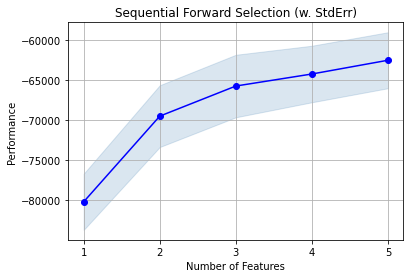

In [92]:
import matplotlib.pyplot as plt
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [93]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
sfs_back = sfs(lr,
            k_features=5,
            forward=False,
            floating=False,
            scoring='neg_mean_squared_error',
            cv=10)


sfs = sfs_forward.fit(X_MLExtend, Y_MLExtend)
print('Best subset:', sfs.k_feature_names_)

Best subset: ('Rent', 'Utilities', 'Debt', 'Sector No_2', 'Sector No_4')


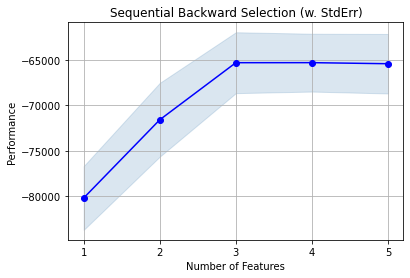

In [28]:
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Backward Selection (w. StdErr)')
plt.grid()
plt.show()

In [95]:
X_selected = X_MLExtend[['Rent', 'Utilities', 'Debt', 'Sector No_2', 'Sector No_4']]

X_selected = sm.add_constant(X_selected )


ols = sm.OLS(Y, X_selected ).fit()
ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Monthly Payment   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     106.1
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           6.48e-76
Time:                        09:47:43   Log-Likelihood:                -3462.3
No. Observations:                 500   AIC:                             6937.
Df Residuals:                     494   BIC:                             6962.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2140.1128    318.774      6.714      0.000    1513.792    2766.433
Rent         -363.7805     64.264     -5.661      0.000    -490.045    -237.516
Utilities      -5.4921      1.305     -4.207      0.000      -8.057      -2.927
Debt            0.0722      0.011      6.575      0.000       0.051       0.094
Sector No_2   141.5983     28.772      4.921      0.000      85.068     198.128
Sector No_4  -216.8119     29.125     -7.444      0.000    -274.036    -159.588
==============================================================================
Omnibus:                        9.482   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.459
Skew:                           0.325   Prob(JB):                      0.00883
Kurtosis:                       3.174   Cond. No.                     1.36e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
X_MLExtend.sample (2)


,Family Size,Sector No,Rent,Own,Income,Utilities,Debt
220,2,3,1,0,97682,201,3054
304,3,3,0,1,83669,266,5224


In [32]:
Y_MLExtend.head(2)

0    1585
1    1314
Name: Monthly Payment, dtype: int64

In [35]:
#'Family Size', 'Sector No', 'Own', 'Income', 'Debt
X_MLExtend_df2= X_MLExtend.drop(["Rent","Utilities"], axis=1)

In [37]:
X_MLExtend_df2= sm.add_constant(X_MLExtend_df2 )

ols = sm.OLS(Y_MLExtend, X_MLExtend_df2 ).fit()

ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Monthly Payment   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     96.51
Date:                Thu, 08 Sep 2022   Prob (F-statistic):           8.05e-71
Time:                        17:31:42   Log-Likelihood:                -3474.3
No. Observations:                 500   AIC:                             6961.
Df Residuals:                     494   BIC:                             6986.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         809.9454     58.567     13.829      0.000     694.874     925.017
Family Size   -50.2318      8.287     -6.061      0.000     -66.515     -33.949
Sector No     -72.3720     11.982     -6.040      0.000     -95.913     -48.831
Own            78.5683     38.209      2.056      0.040       3.496     153.640
Income          0.0010      0.000      2.102      0.036    6.67e-05       0.002
Debt            0.0897      0.013      6.971      0.000       0.064       0.115
==============================================================================
Omnibus:                       16.098   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.760
Skew:                           0.437   Prob(JB):                     0.000229
Kurtosis:                       3.199   Cond. No.                     3.80e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

It does not make that much of change in the Adjusted R-sqaurred of 513 there is no change in the coef even if the predictors are not the same.
.It seems like these predictors are not best one to predict montly payment.   


Q2. MLR Feature Selection – Box Office Revenue Prediction
An industry analyst is interested in building a predictive model to understand the impact of various factors and opening week revenue numbers in the overall collections of a
movie (Total revenue).
Box Office collection of Bollywood movies were recorded. The data is provided in file:
MLR_MovieBoxOffice_data.csv.

1) Identify the variables that can be used to fit a linear regression model.

2) How is the revenue impacted by genre of the movie?

3) Does the month have any role to play in movie opening?

4) Use any variable reduction technique to fit a model using all relevant variables.

5) Do you find any outliers in the dataset? What could be the possible reason for those being outliers?

1) Identify the variables that can be used to fit a linear regression model.

In [97]:
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn; 
import warnings
warnings.filterwarnings('ignore')

In [103]:
MLR_MovieBoxOffice_df=pd.read_csv('MLR_MovieBoxOffice_data.csv')
MLR_MovieBoxOffice_df.tail(2)

,movie_name,revenue_total,revenue_opening_day,revenue_opening_weekend,revenue_firstweek,movie_genre,runtime,movie_director,release_month,release_year
128,Simran,17.26,2.77,10.65,15.48,Drama,124,Hansal Mehta,Sep,2017
129,Poster Boys,12.73,1.75,7.25,11.20,Comedy,131,Shreyas Talpade,Sep,2017


In [105]:
MLR_MovieBoxOffice_df1=pd.read_csv('MLR_MovieBoxOffice_data.csv', parse_dates={"date":["release_year","release_month"]})
MLR_MovieBoxOffice_df1.tail(5)

,date,movie_name,revenue_total,revenue_opening_day,revenue_opening_weekend,revenue_firstweek,movie_genre,runtime,movie_director
125,2017-09-01,Bhoomi,10.63,2.25,7.48,10.28,Drama,135,Omung Kumar
126,2017-09-01,Haseena Parkar,8.03,1.87,6.10,8.00,Biographical,124,Apoorva Lakhia
127,2017-09-01,Lucknow Central,11.20,2.04,8.42,10.42,Thriller,147,Ranjit Tiwari
128,2017-09-01,Simran,17.26,2.77,10.65,15.48,Drama,124,Hansal Mehta
129,2017-09-01,Poster Boys,12.73,1.75,7.25,11.20,Comedy,131,Shreyas Talpade


In [107]:
MLR_MovieBoxOffice_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     130 non-null    datetime64[ns]
 1   movie_name               130 non-null    object        
 2   revenue_total            130 non-null    float64       
 3   revenue_opening_day      130 non-null    float64       
 4   revenue_opening_weekend  130 non-null    float64       
 5   revenue_firstweek        130 non-null    float64       
 6   movie_genre              130 non-null    object        
 7   runtime                  130 non-null    int64         
 8   movie_director           130 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 9.3+ KB


In [113]:
MLR_MovieBoxOffice_df1["movie_director"].value_counts()

Anubhav Sinha          3
Rohit Shetty           2
Omung Kumar            2
Milap Zaveri           2
Anurag Kashyap         2
                      ..
Ashwin Saravanan       1
Sandeep Reddy Vanga    1
Vikas Bahl             1
Prakash Kovelamudi     1
Shreyas Talpade        1
Name: movie_director, Length: 116, dtype: int64

In [171]:
MLR_MovieBoxOffice_df1_dummy= pd.get_dummies(MLR_MovieBoxOffice_df1, columns=["movie_genre", "movie_director"])
MLR_MovieBoxOffice_df1_dummy.sample(2)

,date,movie_name,revenue_total,revenue_opening_day,revenue_opening_weekend,revenue_firstweek,runtime,movie_genre_Action,movie_genre_Biographical,movie_genre_Comedy,...,movie_director_Umesh Shukla,movie_director_Vidhu Vinod Chopra,movie_director_Vijay Krishna Acharya,movie_director_Vikas Bahl,movie_director_Vikram Bhatt,movie_director_Vinod Kapri,movie_director_Vishal Bhardwaj,movie_director_Vishal Pandya,movie_director_Vivek Agnihotri,movie_director_Zoya Akhtar
11,2020-01-01,Tanhaji: The Unsung Warrior,276.90,15.10,61.75,118.91,134,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,2019-11-01,Bala,115.28,10.15,43.95,72.24,129,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.linear_model import Lasso

In [187]:
X=MLR_MovieBoxOffice_df1_dummy.drop(["movie_name","revenue_total"], axis=1)

y=MLR_MovieBoxOffice_df1_dummy["revenue_total"]


In [188]:
la_model = Lasso(alpha=1.0)


In [190]:
X.dtypes

date                              datetime64[ns]
revenue_opening_day                      float64
revenue_opening_weekend                  float64
revenue_firstweek                        float64
runtime                                    int64
                                       ...      
movie_director_Vinod Kapri                 uint8
movie_director_Vishal Bhardwaj             uint8
movie_director_Vishal Pandya               uint8
movie_director_Vivek Agnihotri             uint8
movie_director_Zoya Akhtar                 uint8
Length: 137, dtype: object

In [ ]:

la_model.fit(X, y)


In [ ]:
la_model.coef_

In [195]:
#2) How is the revenue impacted by genre of the movie?
X1=MLR_MovieBoxOffice_df1_dummy[["movie_genre_Action","movie_genre_Biographical","movie_genre_Comedy"]]
X1 = sm.add_constant(X1) # adding a constant
Y1=MLR_MovieBoxOffice_df1_dummy["revenue_total"]


In [196]:
reg_model = sm.OLS(Y1,X1).fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:          revenue_total   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     3.366
Date:                Mon, 12 Sep 2022   Prob (F-statistic):             0.0208
Time:                        15:04:42   Log-Likelihood:                -746.33
No. Observations:                 130   AIC:                             1501.
Df Residuals:                     126   BIC:                             1512.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [200]:
 #Does the month have any role to play in movie opening?
    


SyntaxError: invalid syntax (719250046.py, line 5)

In [ ]:
 #Use any variable reduction technique to fit a model using all relevant variables.

In [ ]:
#Do you find any outliers in the dataset? What could be the possible reason for those being outliers?



## Q3. MLR – Feature Selection – Building Energy Efficiency

A study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) 
as a function of building parameters. We perform energy analysis using 12 different building shapes. 
The dataset comprises 768 samples and 8  features, aiming to predict two real valued responses (heating load and cooling
load). File: MLR_BuildingEffciency.csv
1) Which features impact the heating load?
2) Which features impact the cooling load?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np

In [116]:
MLR_BuildingEffciency_df = pd.read_csv('MLR_BuildingEfficiency.csv')
MLR_BuildingEffciency_df 


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [117]:
MLR_BuildingEffciency_df .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [118]:
MLR_BuildingEffciency_df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


<Figure size 432x288 with 0 Axes>

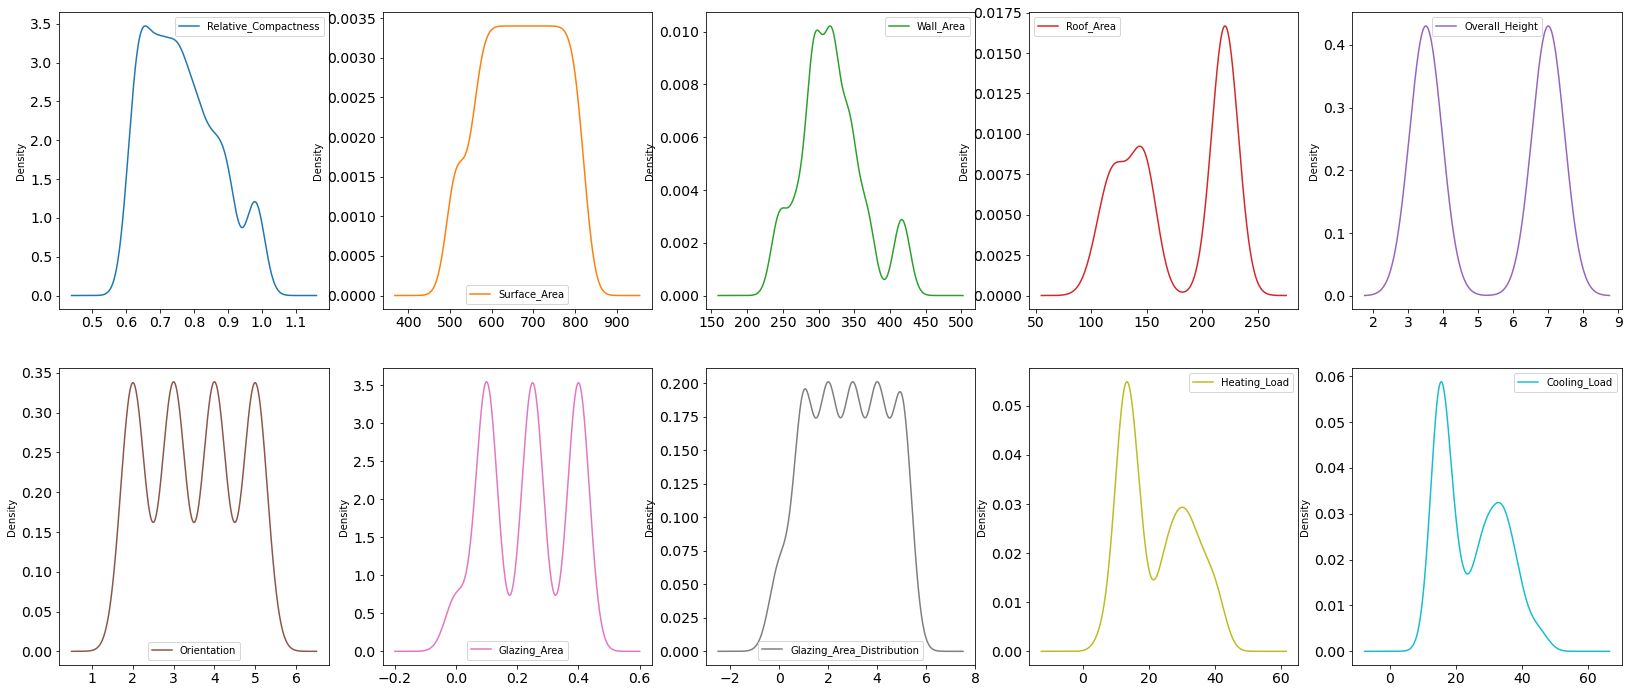

<Figure size 432x288 with 0 Axes>

In [121]:
#  KDE plot
MLR_BuildingEffciency_df.plot(kind='kde', subplots=True, layout=(2,5), figsize=(28,12), fontsize=14, sharex=False, sharey=False)
plt.figure()

<AxesSubplot:>

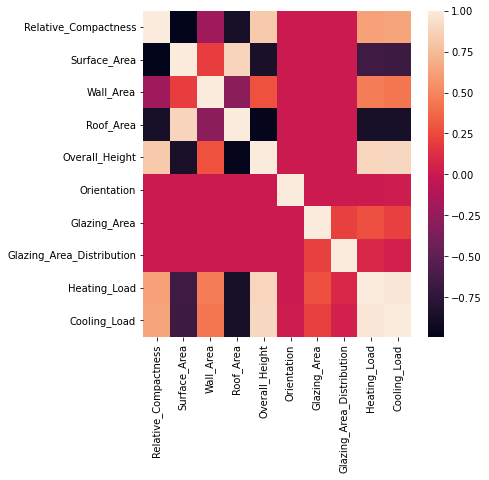

In [120]:
import seaborn as sn; 

# Compute the correlation matrix
corr = MLR_BuildingEffciency_df.corr()

# Set up the matplotlib figure
plt.subplots(figsize=(6, 6))

# Draw the heatmap
sn.heatmap(corr) 

In [153]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

lr_model = LinearRegression()
ri_model = Ridge(alpha=1.0)
la_model = Lasso(alpha=1.0)
en_model = ElasticNet(alpha=1.0, l1_ratio=0.1)


In [158]:
x1 = MLR_BuildingEffciency_df.drop(['Heating_Load','Cooling_Load'], axis=1)
x1 = nr.fit_transform(x)
y1 = MLR_BuildingEffciency_df[['Heating_Load','Cooling_Load']]

In [159]:
# train the models with the synthetic data 
lr_model.fit(x1, y1)
ri_model.fit(x1, y1)
la_model.fit(x1, y1)
en_model.fit(x1, y1)

ElasticNet(l1_ratio=0.1)

In [160]:
#Normalize the inputs and split the output
from sklearn.preprocessing import Normalizer
nr = Normalizer(copy=False)

x = MLR_BuildingEffciency_df.drop(['Heating_Load','Cooling_Load'], axis=1)
x = nr.fit_transform(x)
y = MLR_BuildingEffciency_df[['Heating_Load','Cooling_Load']]

In [161]:
# collect all coefficients in a pandas dataframe
coeff = {"Linear": lr_model.coef_,"Ridge": ri_model.coef_, "Lasso": la_model.coef_, "ElasticNet": en_model.coef_}



In [162]:
lr_model.coef_

array([[-2.97040639e+04, -3.14549322e+13,  3.14549322e+13,
         6.29098645e+13,  4.40307188e+03, -2.26004639e+01,
         1.52795279e+04,  1.57483177e+02],
       [-2.92034553e+04, -1.33478086e+13,  1.33478086e+13,
         2.66956172e+13,  4.52026781e+03,  9.64952462e+01,
         1.13322228e+04,  3.33896351e+01]])

In [163]:
ri_model.coef_

array([[  0.31756674, -23.38927   ,  75.26044783, -49.32485892,
          5.41489699,   0.68517623,   0.42783247,   2.0125666 ],
       [  0.33346362, -21.52920318,  70.17980039, -45.85450179,
          5.46482961,   0.92772869,   0.32746951,   1.401674  ]])

In [165]:
la_model.coef_

array([[ 0., -0.,  0., -0.,  0.,  0.,  0.,  0.],
       [ 0., -0.,  0., -0.,  0.,  0.,  0.,  0.]])

In [167]:
en_model.coef_

array([[ 0.        , -0.07737346,  0.49035653, -0.28386499,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        , -0.06404058,  0.44911741, -0.256579  ,  0.        ,
         0.        ,  0.        ,  0.        ]])

I am not sure but based on the result with lasso  I can say that all the Which features impact the heating load and the colling load. 
Just confirm that I fitted the model and it appreads that the model is 90% accurate with all the  features. 

In [125]:
# Train & test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state= 10)
model = LinearRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

In [127]:
heating_predict = pd.DataFrame({'Actual': y_test['Heating_Load'], 'Predicted': y_predict[:,0]})
heating_predict

,Actual,Predicted
568,19.52,17.415040
620,16.76,18.370144
456,12.32,11.818452
197,28.05,27.454157
714,19.00,17.798262
...,...,...
70,32.94,34.007006
679,36.57,34.161877
375,13.00,13.978360
700,14.60,15.637602


In [128]:
cooling_predict = pd.DataFrame({'Actual': y_test["Cooling_Load"], 'Predicted': y_predict[:,1]})
cooling_predict

,Actual,Predicted
568,22.72,19.304735
620,17.36,20.048833
456,14.92,14.389191
197,33.91,29.734865
714,22.25,19.609414
...,...,...
70,34.14,35.673655
679,36.10,35.031289
375,15.87,17.030645
700,16.85,17.357114


In [132]:
from sklearn.metrics import r2_score
Accuracy=r2_score(y_test, y_predict)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 90.33
